# Project Two: Investigate a Movie Database from TMDB

## Outline
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDb) is a community-built movie and TV database. Every piece of data has been added by e amazing community dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched and something we're incredibly proud of. Put simply, we live and breathe community and that's precisely what makes us different. Using our extensive dataset acqiuired from this source (TMDB) we will be analyzing and looking for valuable insights from this data.

### Importing all dependencies

> We begin by importing all the necessary dependencies for this project. We'll be needing Pands, Numpy, Matplotlib and Seaborn libraries to accomplish our aims in this project.

In [54]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import seaborn as sns
from IPython.display import HTML
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='wrangling'></a>
## Data Wrangling

In this section of this report, we load in the data, evaluate the cleanliness of the data, and determine whether any data cleaning of the dataset is necessary before we proceed with our analysis.

### First, we check our data integrity with the following steps...

> ***Step One:*** Here, we check for properties like: measures of centre and spread (mean, stdev, variance), minimum and maximum values, shape of data and unique values in our dataset.

> ***Findings:*** Here, we got preliminary information about our dataset. As we proceed, we will base our decisions on this information.

In [30]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')

In [31]:
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [32]:
print ('This is the number of rows and columns in this table:', df.shape)

This is the number of rows and columns in this table: (10866, 21)


In [33]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [34]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

> ***Step Two:*** Here, we check for missing values and decide whether to drop missing fields or fill missing fields. From the data, we also evaluate the best approach to do this.

> ***Findings:*** Here, we found that the all missing values are object-only data types. This means that no field of numeric data type contain missing values.

In [35]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [36]:
print (df.isna().sum());
print (' ')
print (' ')
print (df.dtypes)

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64
 
 
id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview              

> ***Step Three:*** Here, we check for duplicate values in our dataset then  we evaluate the best approach to eliminating the duplicates.

> ***Findings:*** We found that only one row exists as a duplicate.

In [37]:
print ('The total number of duplicates in our dataset is:' , df.duplicated().sum())

The total number of duplicates in our dataset is: 1


### Next, we clean our data to ensure a high data integrity...

> ***Decision:*** Here, we decided to fill some missing fields with placeholders and drop other missing columns (.e.g. Production Companies, Homepage, Tagline, Overview and Cast) that are unnecessary in our analytics. We have decided to do this for two main reasons.

> ***Reason 1:*** Because all our missing values are string/object-type fields, dropping these fields(rows) will mean removing all numeric data attached to them as well. This is not good. 

> ***Reason 2:*** Because the amount of all missing values is significant (above 30%) when compared to the res of our entire datset. Therefore, dropping all rows associated with each missing value would greatly impact our analysis.This is also not good.

In [38]:
#Removing the following columns 
# homepage

#df.drop('homepage', axis=1, inplace=True)

In [39]:
# confirming whether Homepage column has been dropped from table
# number of columns should be 20 (.i.e. 21 - 1 = 20)

print (df.shape)
print (' ')
print (df.isna().sum())

(10866, 21)
 
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [40]:
# dropping remaining columns - producion_companies, tagline, cast, overview

df.drop(['cast', 'tagline', 'overview', 'production_companies'] , axis=1, inplace=True)

In [41]:
# confirming whether remaining columns have been dropped from table
# number of columns should be 16 (.i.e. 20 - 4 = 16 columns)

print (df.shape)
print (' ')
print (df.isna().sum())

(10866, 17)
 
id                   0
imdb_id             10
popularity           0
budget               0
revenue              0
original_title       0
homepage          7930
director            44
keywords          1493
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64


In [42]:
# including keywords column in thelist of columns to be dropped

df.drop(columns='keywords',inplace=True)

In [43]:
# then checking to confirm removal of the column

print (df.shape)

print (df.isnull().sum())

(10866, 16)
id                   0
imdb_id             10
popularity           0
budget               0
revenue              0
original_title       0
homepage          7930
director            44
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64


In [44]:
# time to fill the 3 remaining empty columns - imdb_id, director and genres
# replacing missing values with text.

df['imdb_id'].fillna('No ID', inplace=True)
df['genres'].fillna('No Genres', inplace=True)
df['director'].fillna('No Director', inplace=True)

In [45]:
#confirming whether missing values have been filled.
# This means, the sum of missing values (df.isnull().sum()) should all be zero.

df.isnull().sum()

id                   0
imdb_id              0
popularity           0
budget               0
revenue              0
original_title       0
homepage          7930
director             0
runtime              0
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

In [46]:
#last but not least, it's time to drop the one and only duplicated value.

df.drop_duplicates(inplace=True)

In [47]:
#Now, number of duplicates in our data should equal to zero.

df.duplicated().sum()

0

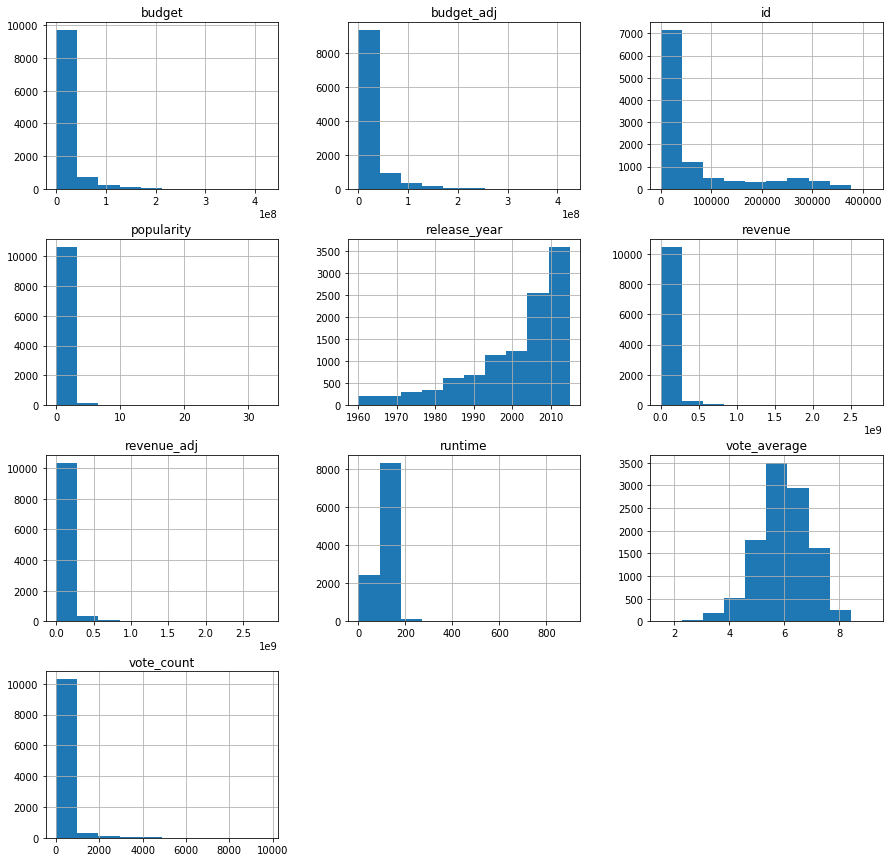

In [48]:
#now we show a distrubution of our final data before we go into exploration and answering our questions.

df.hist(figsize = (15,15));

We can see the distribution above that the majprity of our values are right skewed. Specifically, "budget, "budget_adj", "popularity", "revenue", "revenue_adj", "vote_count" all have higher max values. 

"vote_average" distribution is almost normal. And "release_year" is left-skewed whch tells us that number of movies released increased every year.


<a id='eda'></a>
## Exploratory Data Analysis

In this section, we compute statistics and create visualizations with the goal of addressing the research questions that we have posed in the Introduction section. Our goal is to approach this systemmatically. To look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1: which genres are most popular from year to year? 

To answer this question, we'll take the following two steps:

> Step One: We seperate names of genres into distinct genres. And find the total number of genres.

> Step Two: We make a chart that compares the popularityh of each distinct genre.

In [49]:
genres = df.genres.str.split('|', expand=True).stack().value_counts().index
print("Number of genres is {}".format(genres.size))

Number of genres is 21


We have 20 genres overall. Let's create a color map for them, so that every genre will have a unique color. Choosing colors is a very complicated task, so we’ll use the built-in matplotlib “tab20” colormap that has exactly 20 colors with a good-looking palette.

In [50]:
colors_map = {}
cm = plt.cm.get_cmap('tab20')
#we have 20 colors in [0-1] range
#so start from 0.025 and add 0.05 every cycle
#this way we get different colors for
#every genres
off = 0.025
for genre in genres:
    colors_map[genre] = cm(off)
    off += 0.05

Let's create a function that returns a sorted dataframe with dependency of values from a multiple value column and a single value column. This will help us to analyse all multiple values columns.

In [51]:
def get_mdepend(df, multival_col, qual_col):
    #split column by '|' character and stack
    split_stack = df[multival_col].str.split('|', expand=True).stack()
    #convert series to frame
    split_frame = split_stack.to_frame(name=multival_col)
    #drop unneeded index
    split_frame.index = split_frame.index.droplevel(1)
    #add qual_col, group and find average
    dep = split_frame.join(df[qual_col]).groupby(multival_col).mean()
    #return sorted dependency
    return dep.sort_values(qual_col)  

Next we'll create a function that plots our horizontal bar chart with the popularity of movies for all genres up to the desired year.

In [56]:
def draw_barchart_frame(current_year):
    #get data only up to current_year
    dep = get_mdepend(df.query('release_year <= {}'.format(current_year)),
                         'genres', 'popularity')
    #clear before draw
    ax.clear()
    #plot horizontal barchart using our colormap
    ax.barh(dep.index,
            dep['popularity'].tolist(),
            color=[colors_map[x] for x in dep.index])
    #plot genres and values
    dx = dep.max() / 200
    for i, (value,
            name) in enumerate(zip(dep['popularity'].tolist(), dep.index)):
        #genre name
        ax.text(value - dx,
                i,
                name,
                size=14,
                weight=600,
                ha='right',
                va='center')
        #genre value
        ax.text(value + dx,
                i,
                f'{value:,.2f}',
                size=14,
                ha='left',
                va='center')

    #big current year
    ax.text(1,
            0.2,
            current_year,
            transform=ax.transAxes,
            color='#777777',
            size=46,
            ha='right',
            weight=800)
    #plot caption of ticks
    ax.text(0,
            1.065,
            'Popularity',
            transform=ax.transAxes,
            size=14,
            color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    #chart caption
    ax.text(0,
            1.16,
            'Popular Genres from 1960 to 2015',
            transform=ax.transAxes,
            size=24,
            weight=600,
            ha='left',
            va='top')

Finally we'll create an animation.

In [57]:
#create figure
fig, ax = plt.subplots(figsize=(10, 7))
#remove borders
plt.box(False)
#immediately close it to not provide additional figure 
#after animation block
plt.close()
animator = animation.FuncAnimation(fig,
                                   draw_barchart_frame,
                                   frames=range(1960, 2016),
                                   interval=666)
#add space before animation
print('')
HTML(animator.to_jshtml())

### Question 2: what kinds of properties are associated with movies that have high revenues?

To answer question number 2, let's start by finding any correlation between movie revenue and other properties. For this we'll make use of the "revenue_adj" (Adjusted Revenue).

In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df.head()


id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

   runtime                                     genres release_date  \
0      124  Action|Adventure|Science Fiction|Thriller       6/9/15   
1      120  Action|Adventure|Science Fiction|Thriller      5/13/15   
2      119         Adventure|Science Fiction|Thriller      3/18/15   
3      136   Action|Adventure|Science Fiction|Fantasy     12/15/15   
4      137                      Action|Crime|Thriller       4/1/15   

   vote_count  vote_average  release_year    budget_adj   revenue_adj  
0        5562           6.5          2015  1.379999e+08  1.392446e+09  
1        6185           7.1          2015  1.379999e+08  3.481613e+08  
2        2480           6.3          2015  1.012000e+08  2.716190e+08  
3        5292           7.5          2015  1.839999e+08  1.902723e+09  
4        2947           7.3          2015  1.747999e+08  1.385749e+09

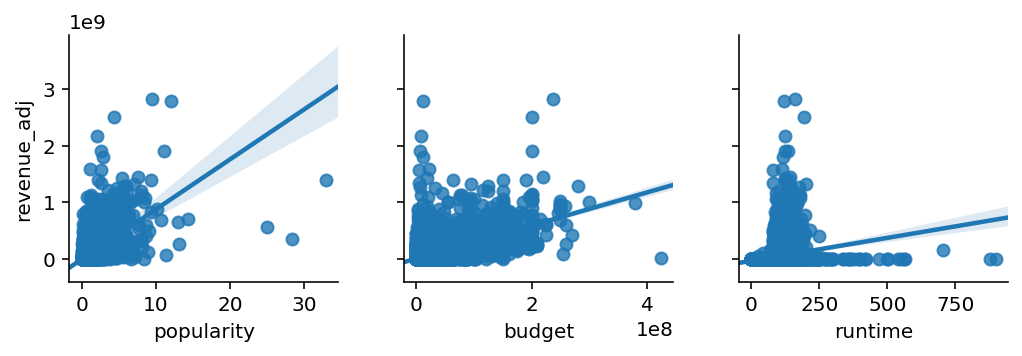

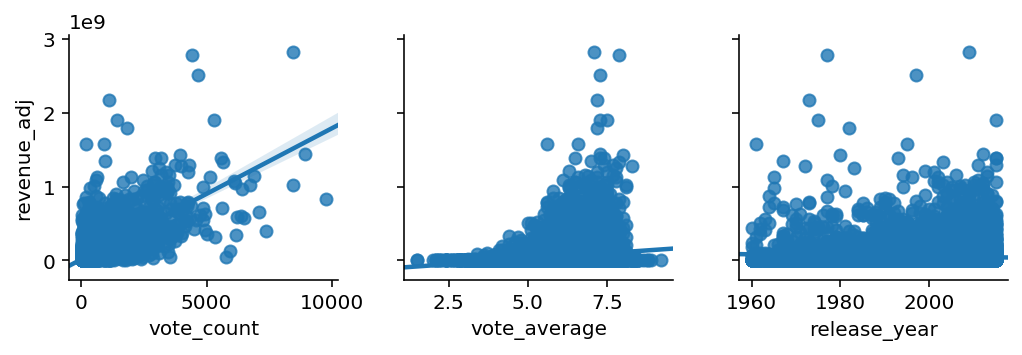

In [59]:
sns.pairplot(data=df,
             x_vars=['popularity', 'budget', 'runtime'],
             y_vars=['revenue_adj'],
             kind='reg');
sns.pairplot(data=df,
             x_vars=['vote_count', 'vote_average', 'release_year'],
             y_vars=['revenue_adj'],
             kind='reg');

From the results above, we can see that...

"popularity" and "vote_count" have a positive correlation with revenue. This makes sense, because the more people who watch a movie, the more revenue it gets.

"budget" has a smaller positive correlation with revenue. This goes to show that higher investments in movies results in higher revenues.

"vote_average" has a weaker positive correlation with revenue. This is quite surprising, because it would be expected that a movie with higher votes would have more people watching hence higher revenues. However, this is not the case here.

<a id='conclusions'></a>
## Conclusions

Finally we can conclude on the following from our findings:

> Research Question 1: our analysis of movie genres versus popularity from 1960 to 2015 shows that the "Thriller" movie genre was the most popular in 1960 while the "Adventure" movie genre was the most popular in the 2015.

> Research Question 2: our analysis have led us to a conclusion that the most common properties of hugh grossing moves are  massive "popularity" of the films, a significantly large "budget" and "vote_counts".

References:

https://github.com/topics/investigate-tmdb-movies

www.google.com

www.stackoverflow.com

https://github.com/deepak525/Investigate_TMDb_Movies/blob/master/investigate_the_TBMb_Dataset.ipynb